In [26]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.DataFrame()
df = tabula.read_pdf("2015-2016.pdf", pages="all", multiple_tables=True)

In [27]:
print(df[21])

                                      0              1              2  \
0                    Total Allocations:  $1,901,386.14  $2,030,626.14   
1      Total Revenue from Student Fees:  $1,650,000.00  $1,650,000.00   
2             Total Revenue from CASSA:    $250,000.00    $250,000.00   
3            Total Revenue from CACSSF:     $33,333.33     $33,333.33   
4                Total Funds Remaining:     $31,947.19    -$97,292.81   
5  Total Transfer from General Reserve:          $0.00     $97,292.81   
6  Total Carry Forwarded from FY 13/14:    $164,324.47     $35,084.47   
7   Total Remaining in General Reserve:    $770,058.56    $640,818.56   

               3  
0  $2,060,326.14  
1  $1,650,000.00  
2    $250,000.00  
3     $33,333.33  
4   -$126,992.81  
5    $126,992.81  
6      $5,384.47  
7    $611,118.56  


In [28]:
def process_df_group(df_start_index, df_end_index=None):
    """
    takes in indices of df and returns processed df
    """
    # select df groups
    if df_end_index == None:
        df_spliced = df[df_start_index] 

        # set first row as header
        df_spliced.columns = df_spliced.iloc[0]
        df_spliced = df_spliced.reindex(df_spliced.index.drop(0))
    else:
        df_spliced_multiple = df[df_start_index:df_end_index]
                
        # set first row as header
        df_columns = df_spliced_multiple[0].iloc[0]
        #print('Cols', df_columns)
        df_spliced_multiple[0] = df_spliced_multiple[0].reindex(df_spliced_multiple[0].index.drop(0))
        
        df_spliced = pd.concat(df_spliced_multiple)
        
        df_spliced.columns = df_columns
        #print(df_spliced.head())
        df_spliced = df_spliced.dropna(axis=1, how='all')
            
    #print('-------')
    #print(df_spliced.columns)
    
    # columns to parse dollar values
    dollar_cols = ['FUNDING REQUEST', 'CFO', 'FINANCE COMMITTEE', 'FINAL ALLOCATION'] 

    # convert dollar values to float values
    for col in dollar_cols:
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace('$', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace(',', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: float(x))

    df_spliced = df_spliced.astype(float, raise_on_error=False)
        
    # remove last row (subtotal row)
    df_spliced = df_spliced[:-1]
    
    # add column for difference between allocation and request
    df_spliced['DIFFERENCE'] = df_spliced['FINAL ALLOCATION'] - df_spliced['FUNDING REQUEST']
    df_spliced['DIFFERENCE PERCENTAGE'] = (df_spliced['FINAL ALLOCATION'] - df_spliced['FUNDING REQUEST'])/df_spliced['FUNDING REQUEST']

    # rename first column from organization type to club name
    df_spliced.columns.values[0] = 'NAME'
    
    return df_spliced


In [29]:
# categories = list of dataframes for each major category
categories = []

category_names = ['publications', 'student_activity_groups', 'student_initiated_service_groups',
                 'asuc_programs_and_operations', 'president_office', 'evp_office', 'eavp_office',
                 'aavp_office', 'osa_office', 'senate', 'asuc_total', 'graduate_assembly', 'totals']

category_splices = [[0, None], [1, 7], [7, 11], [11, None], [12, None], [13, None], [14, None], [15, None],
                   [16, None]]
"""
TODO
excluding some "office of the ...." groups because they are not clubs
"""
for splice in category_splices:
    print(splice)
    categories.append(process_df_group(splice[0], splice[1]))

#print('-------------------------------------------------------')
#print(categories[0])

[0, None]
[1, 7]
[7, 11]
[11, None]
[12, None]
[13, None]
[14, None]
[15, None]
[16, None]


In [30]:
def join_pages(lst_df):
    if type(lst_df) != list:
        return lst_df
    df = lst_df[0]
    for i in range(1,len(lst_df)):
        df = df.append(lst_df[i])
    return df

In [31]:
joined_categories = list(map(join_pages, categories))

# Money Allocated by Organization Type

Each Org and Clubs + Amounts Received

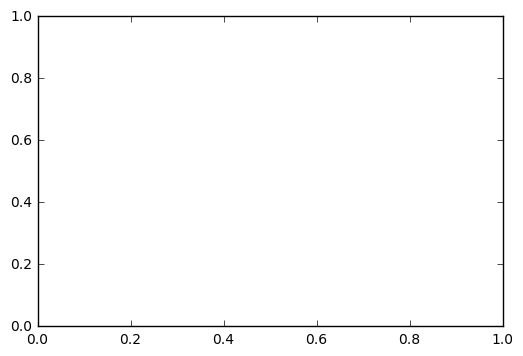

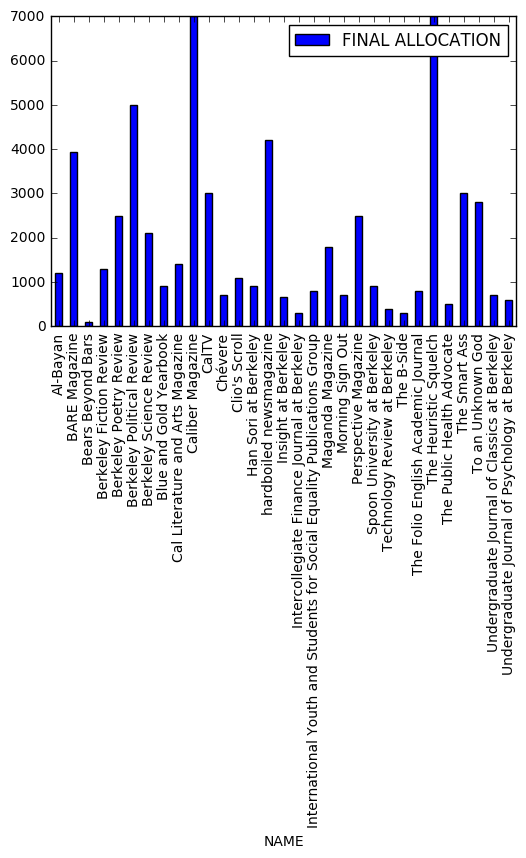

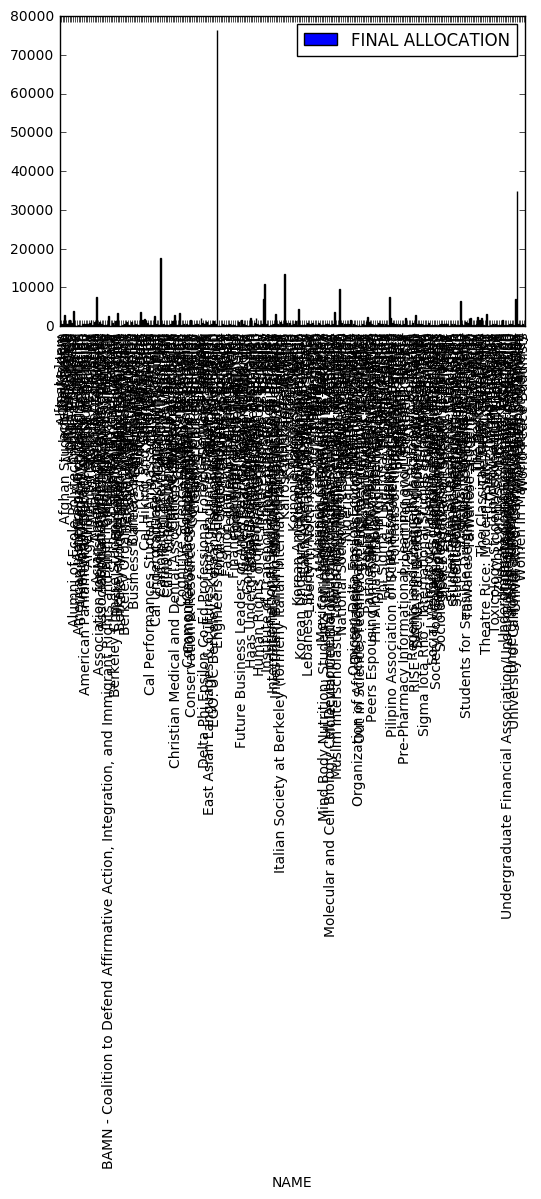

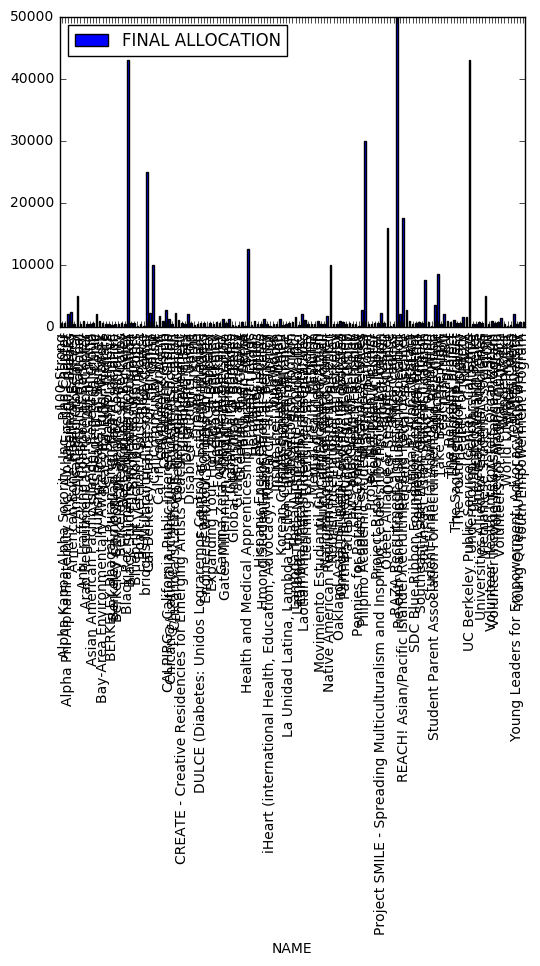

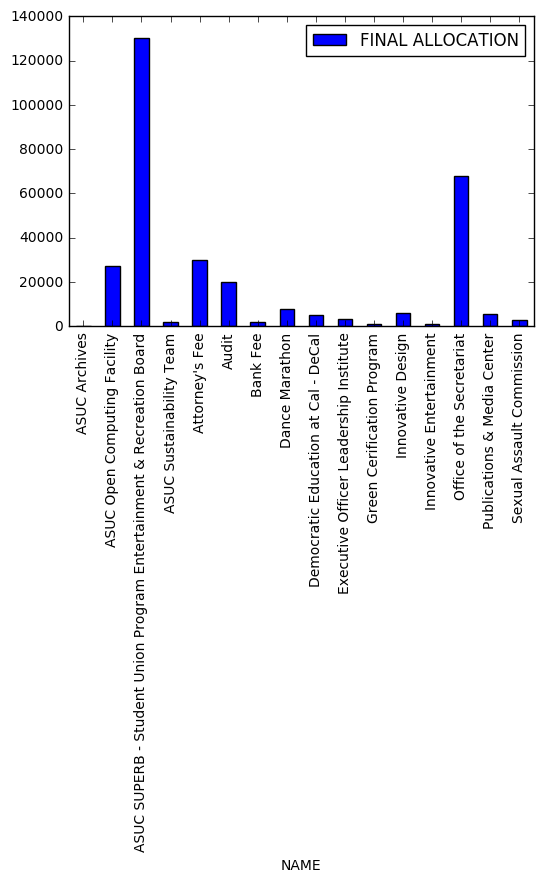

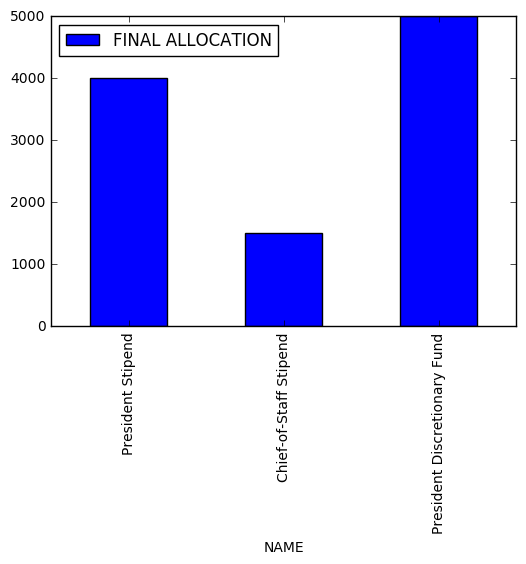

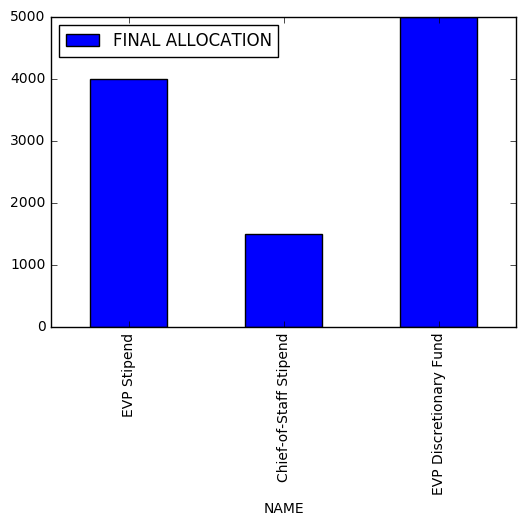

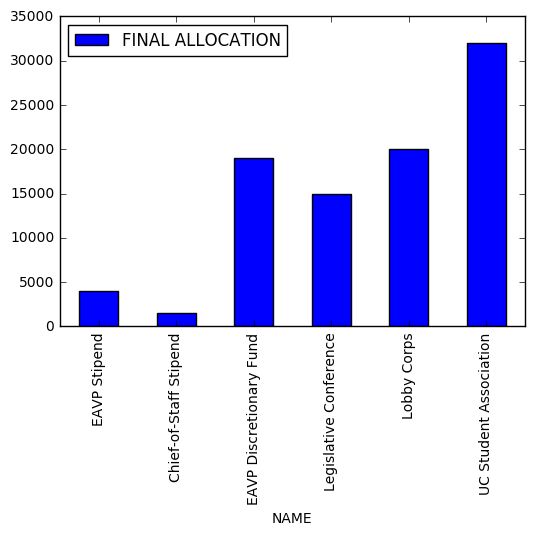

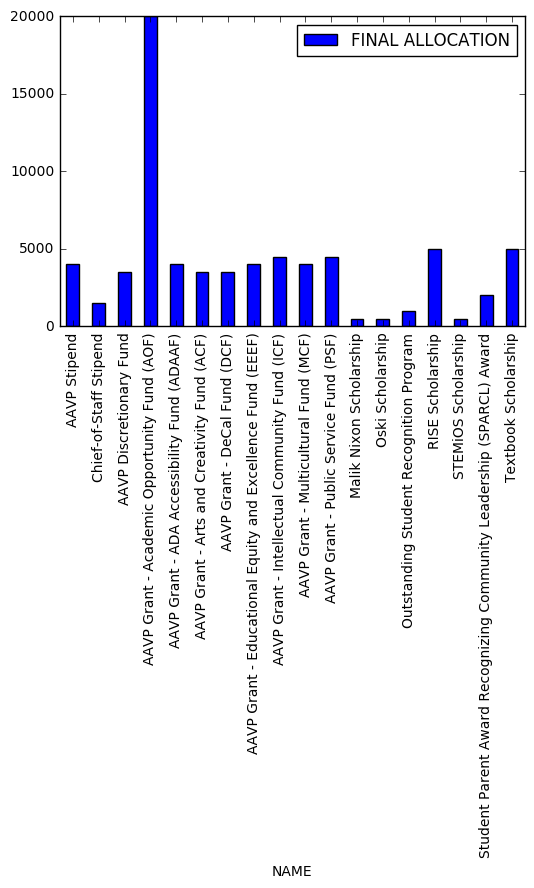

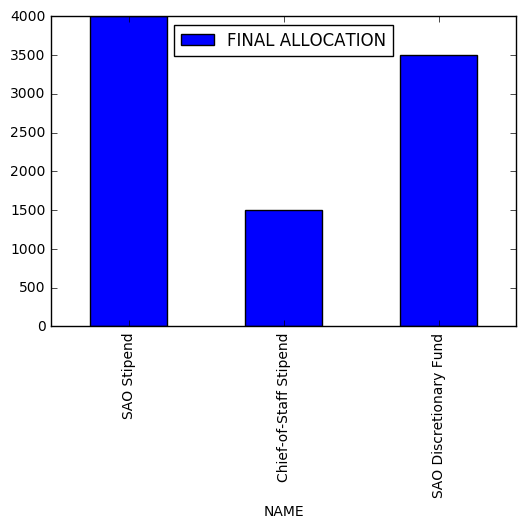

In [32]:
for i in range(len(categories)):
    #print(categories[i]['TYPE (YEAR)'][1])
    plt.figure()
    categories[i].plot.bar(x='NAME',y='FINAL ALLOCATION')
    plt.show()

# Money Requested by Organization Type

Each Org and Clubs + Amounts Requested

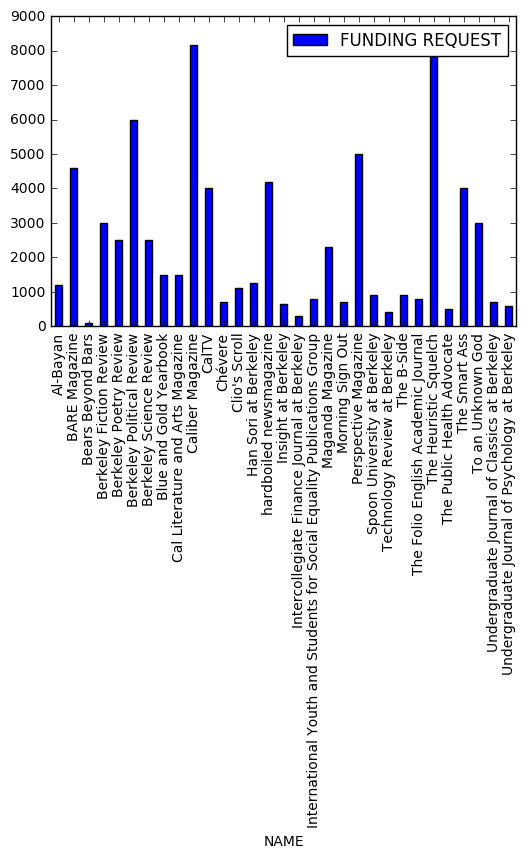

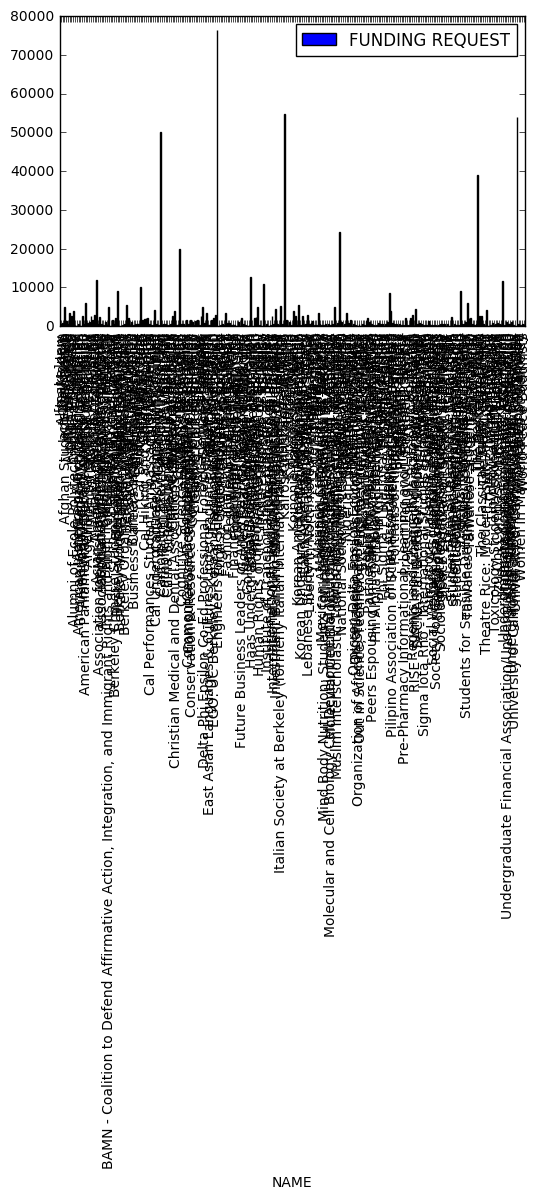

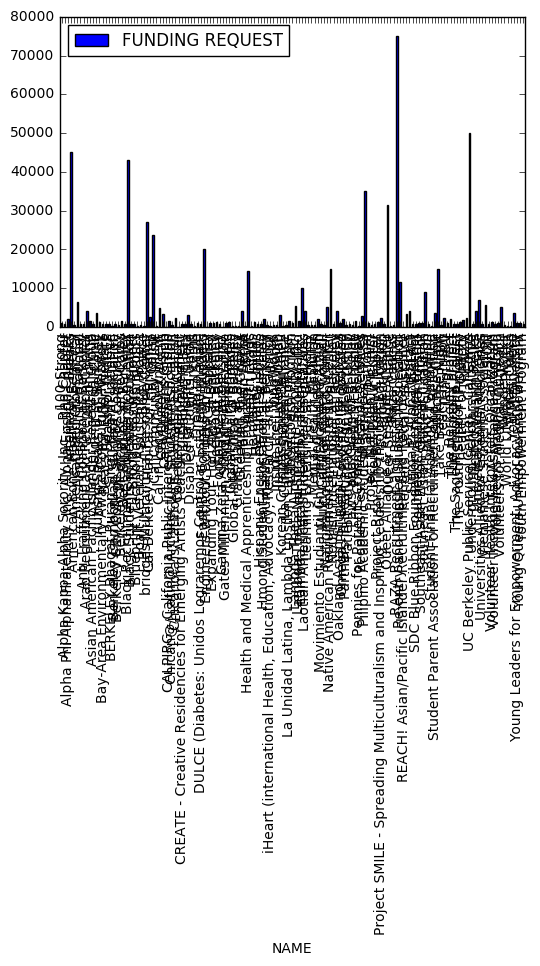

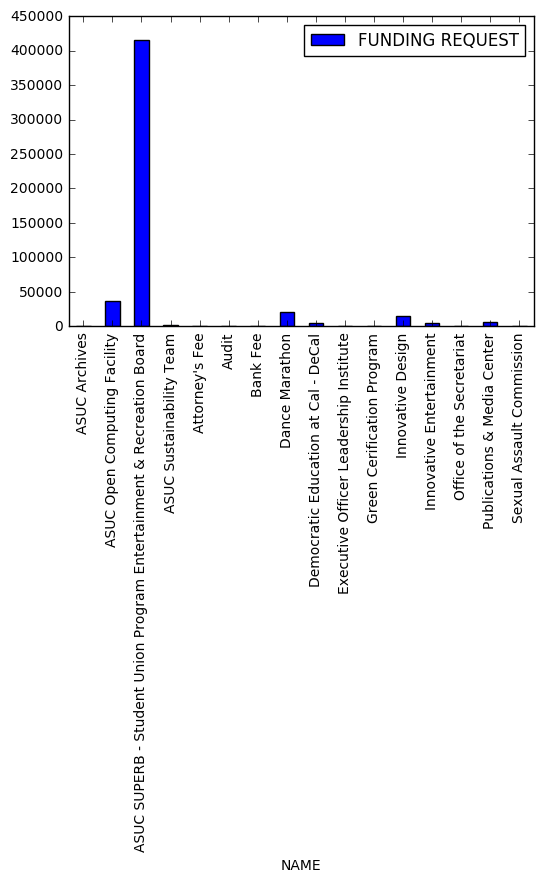

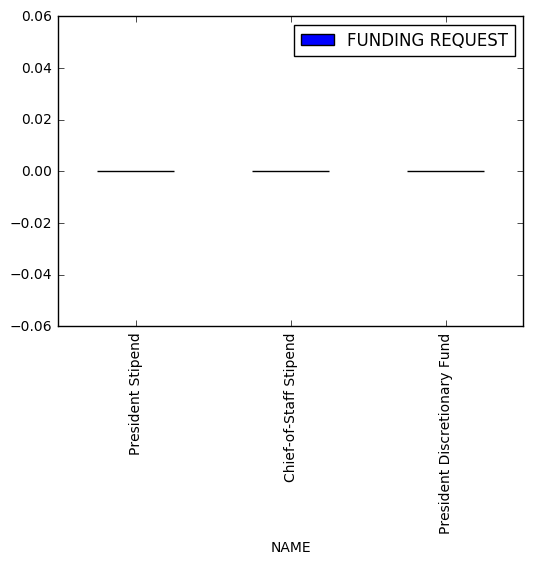

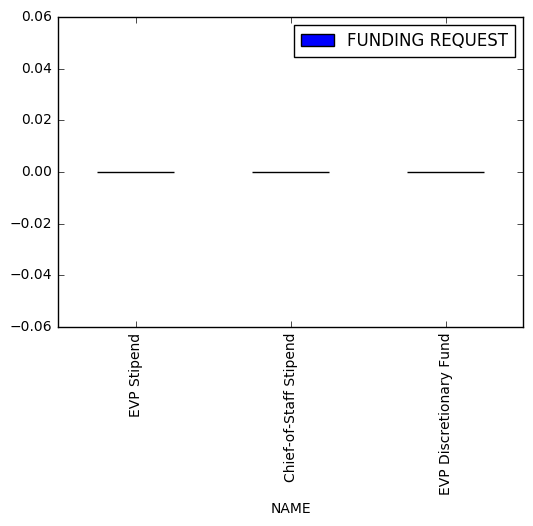

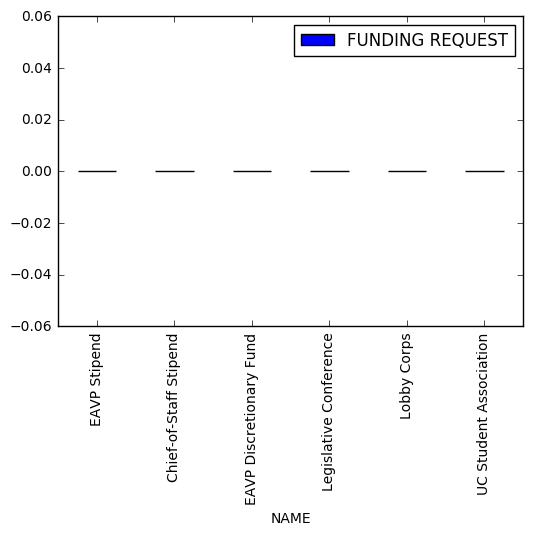

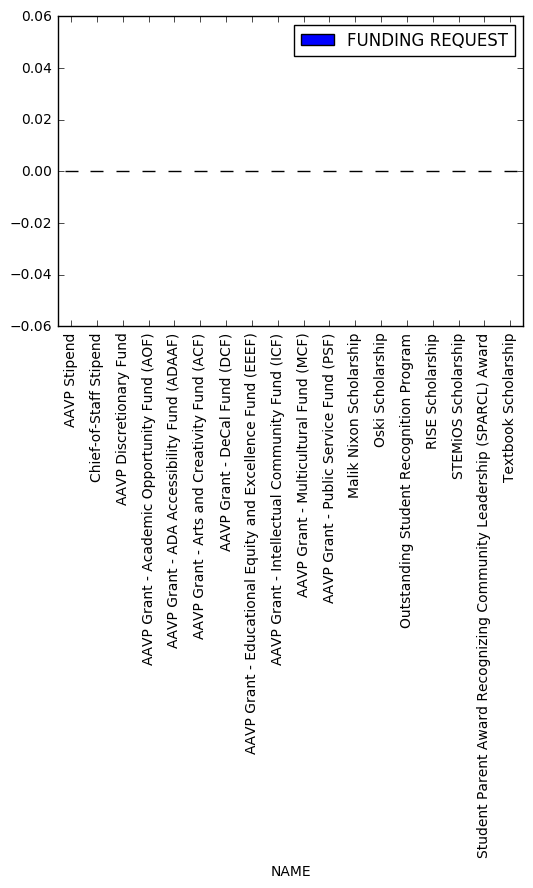

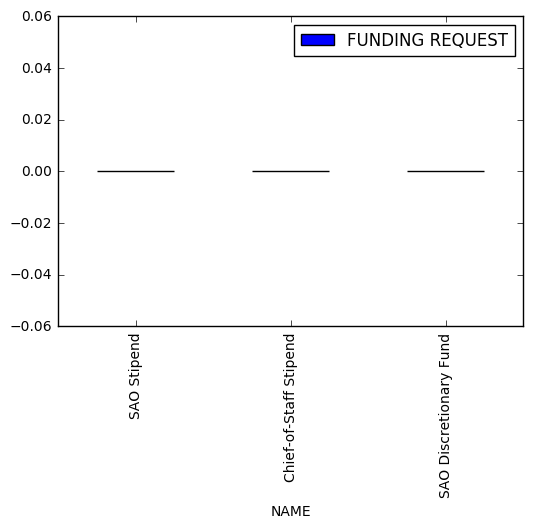

In [33]:
for i in range(len(categories)):
    plt.figure()
    categories[i].plot.bar(x='NAME',y='FUNDING REQUEST')
    plt.show()

# Money Requested vs. Allocated by Organization Type

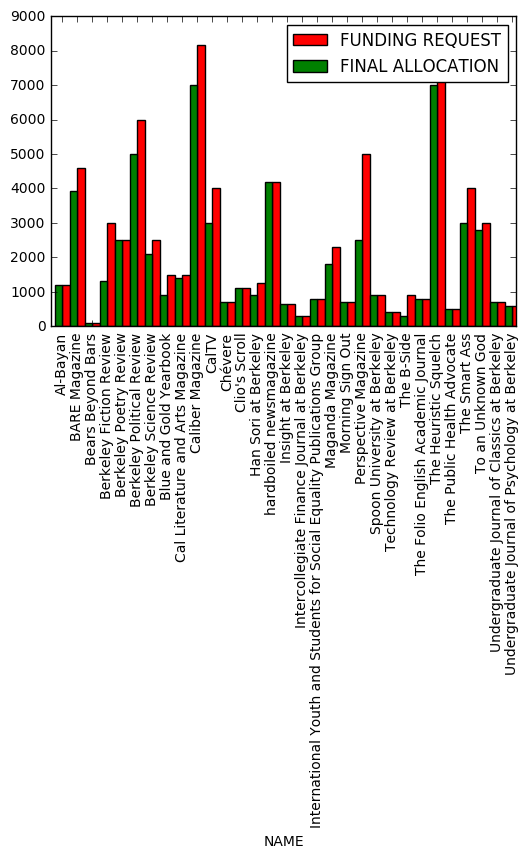

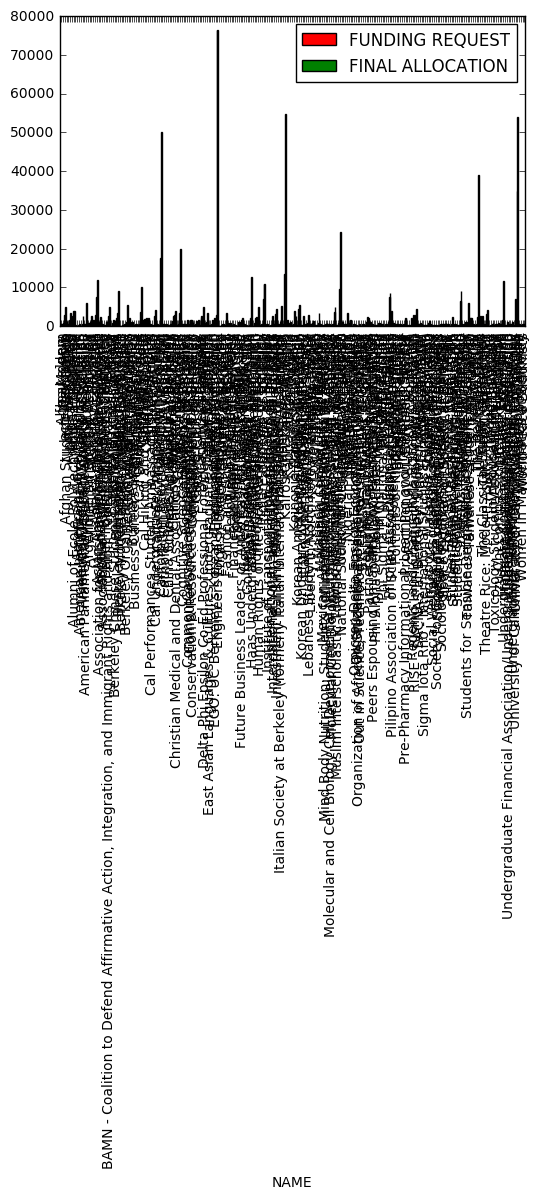

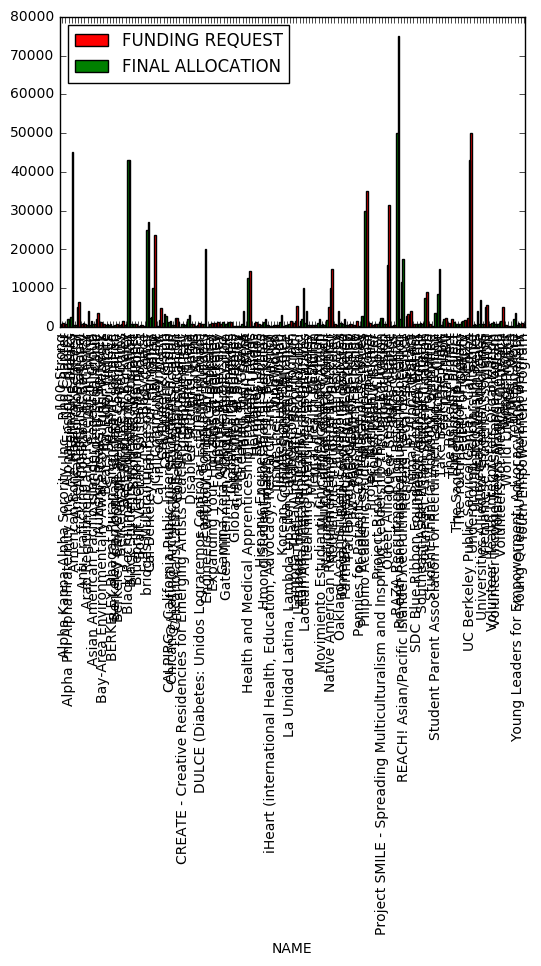

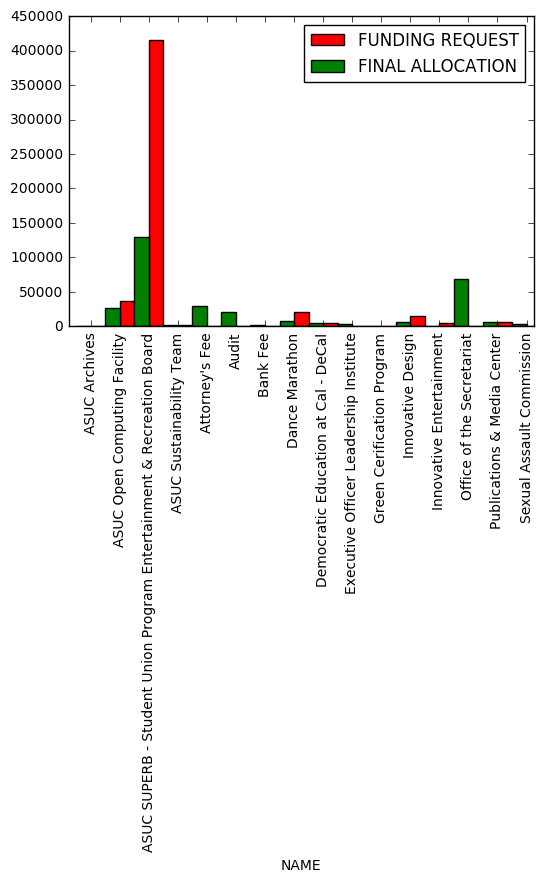

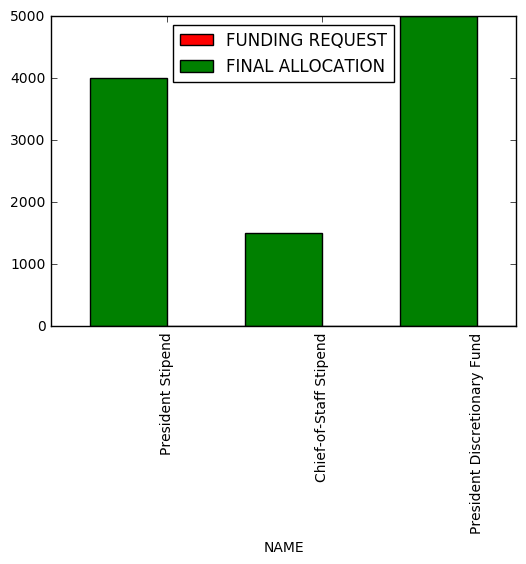

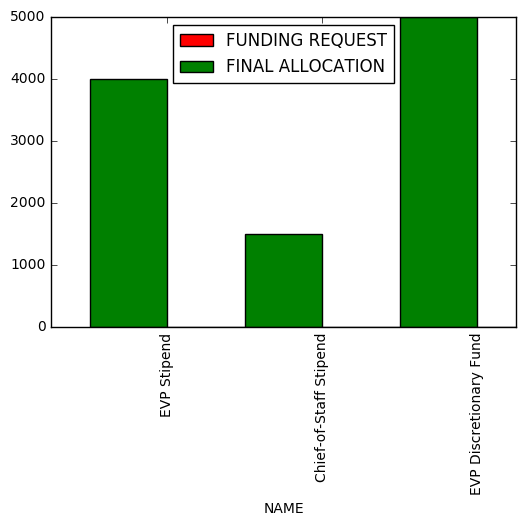

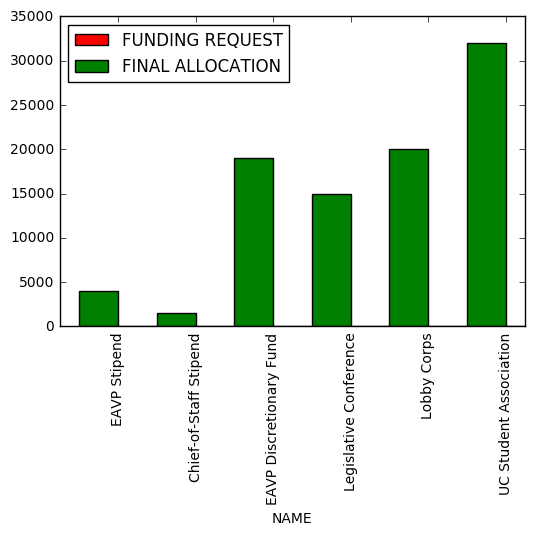

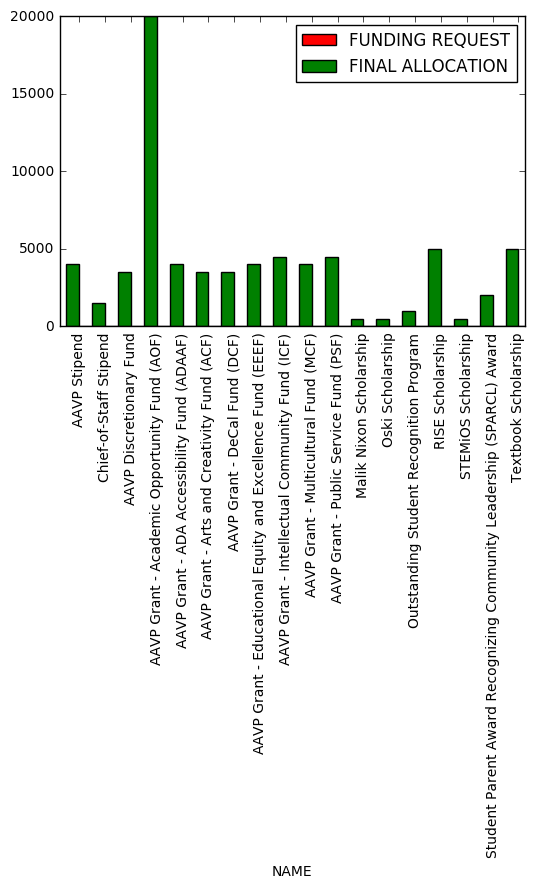

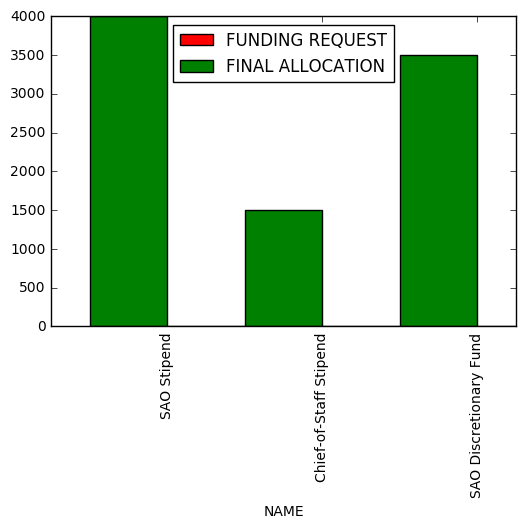

In [34]:
for i in range(len(categories)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='NAME',y='FUNDING REQUEST')
    categories[i].plot(kind='bar', color='green', ax=ax, position=1, x='NAME',y='FINAL ALLOCATION')
    plt.show()

# Difference in Money Percentage Requested vs. Allocated by Organization Type

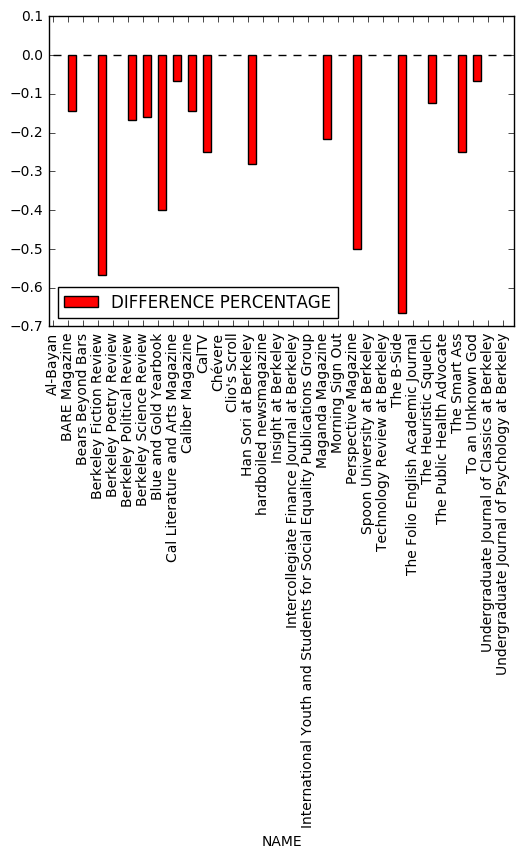

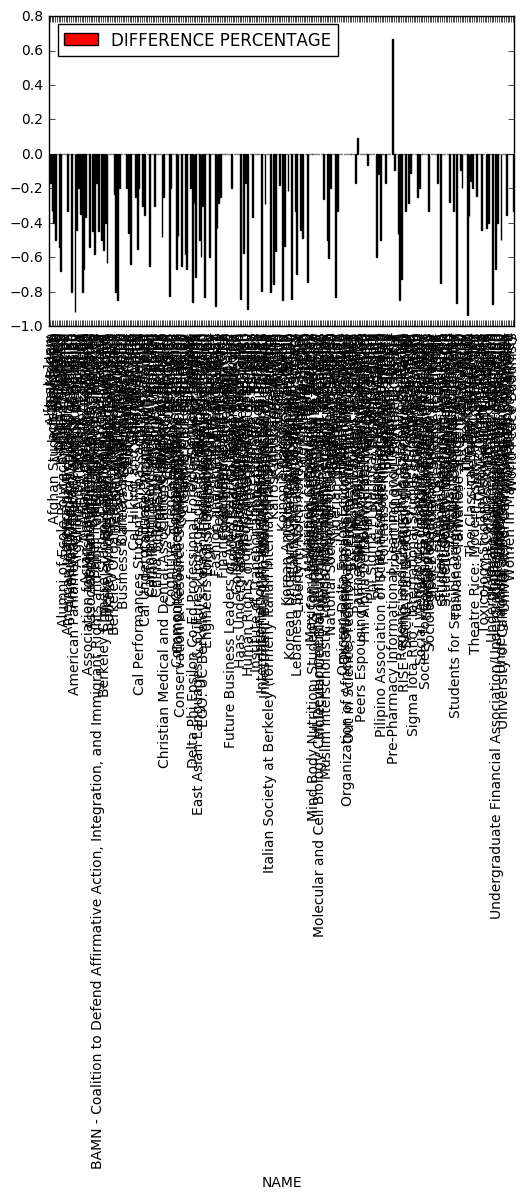

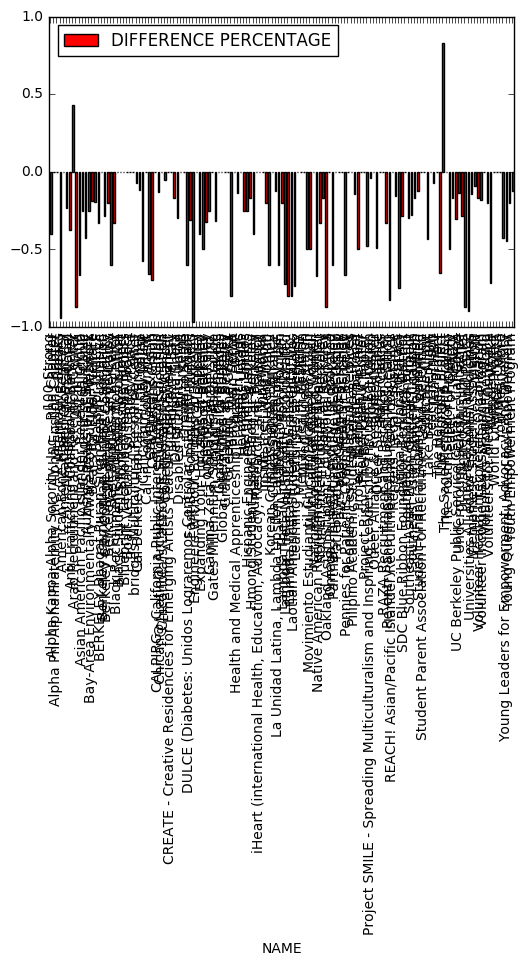

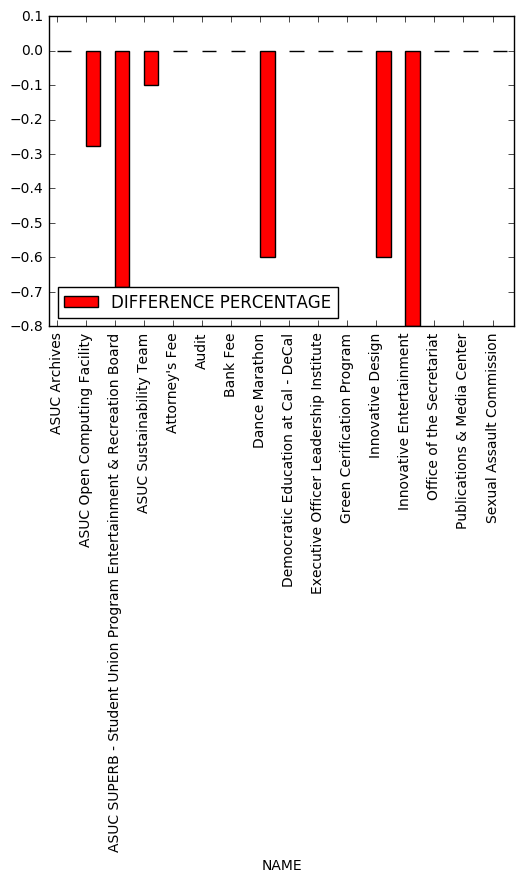

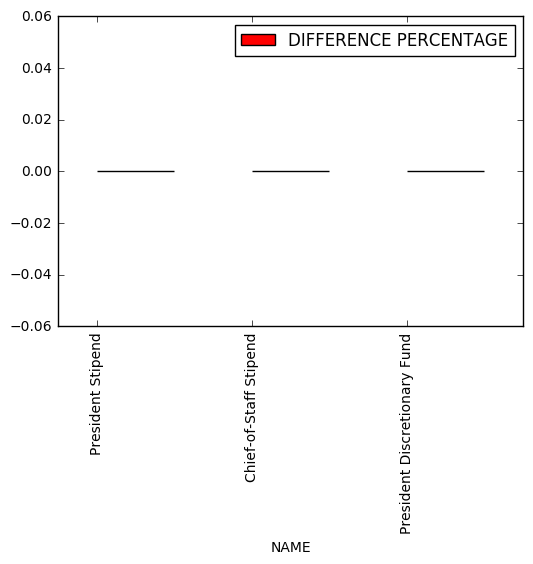

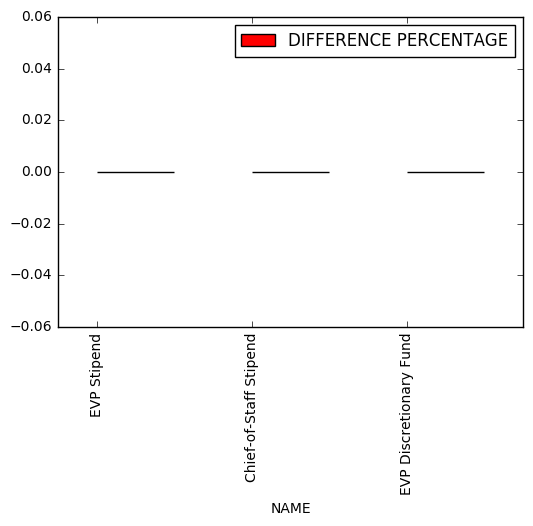

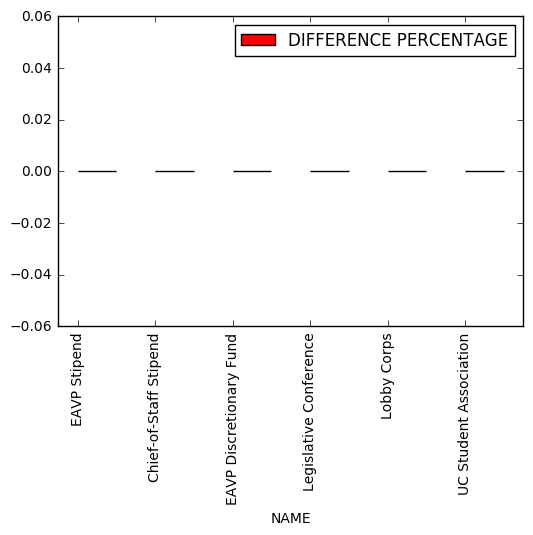

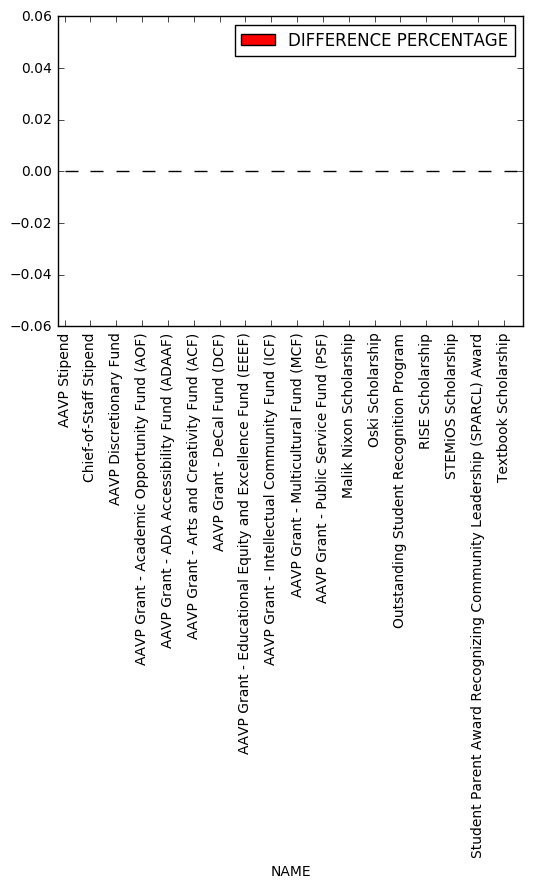

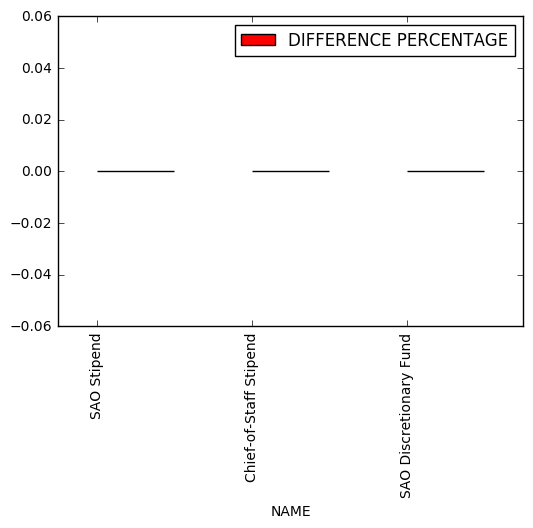

In [35]:
for i in range(len(categories)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='NAME',y='DIFFERENCE PERCENTAGE')
    plt.show()

# Top 10 Differences in Money Requested vs. Allocated by Organization Type

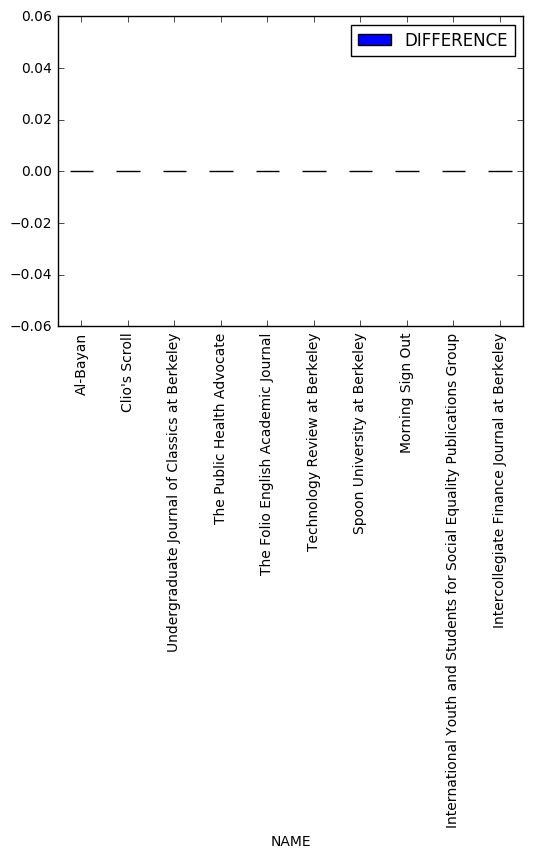

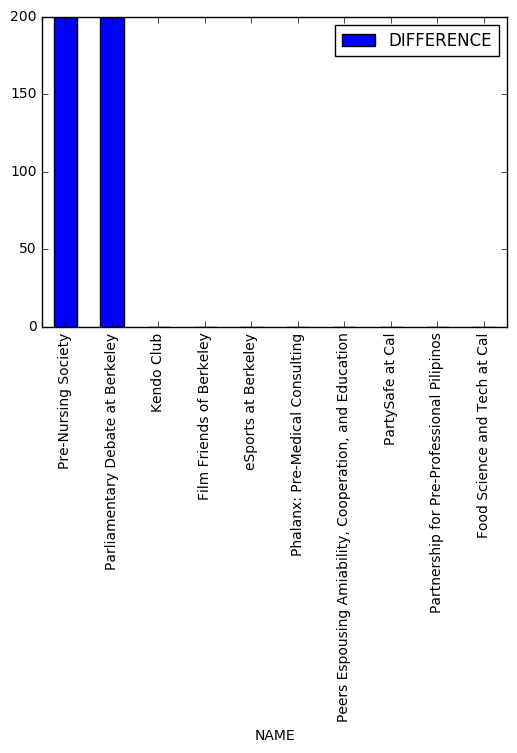

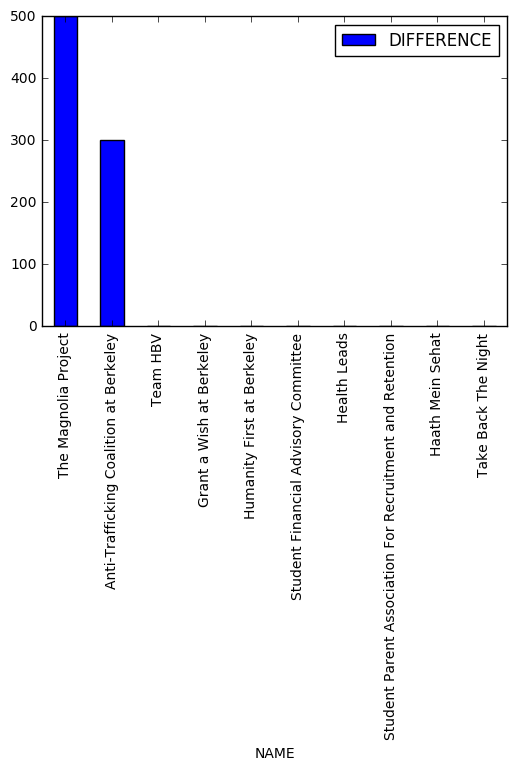

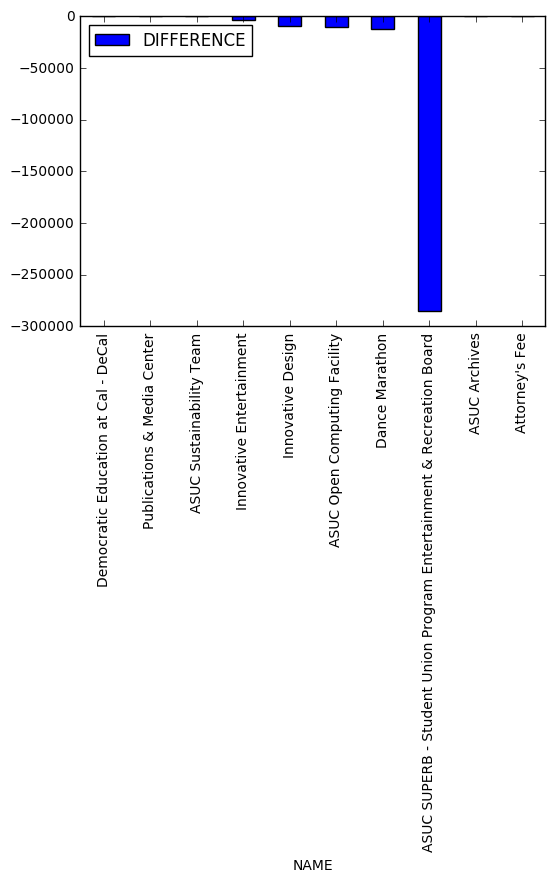

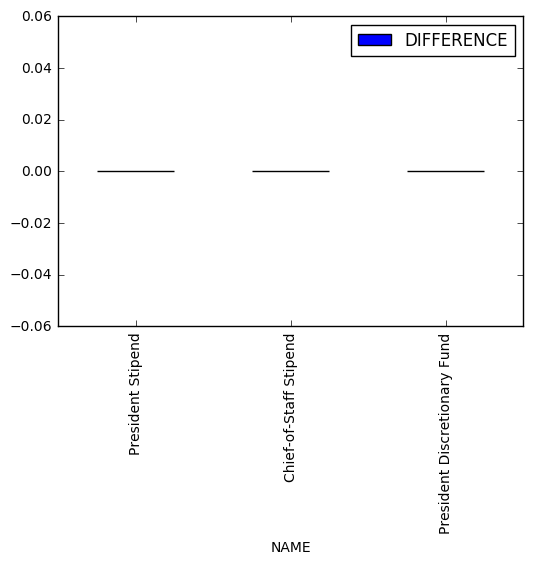

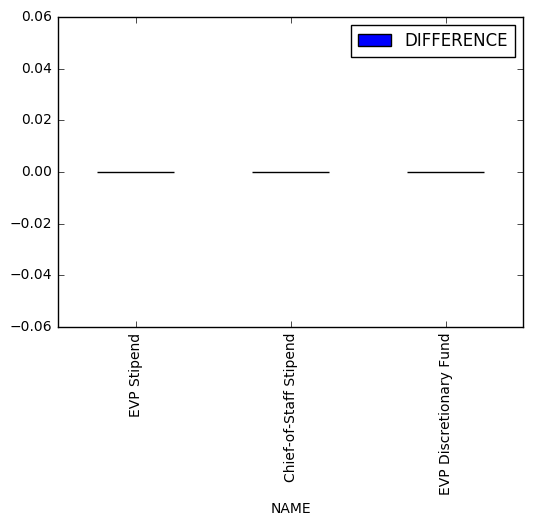

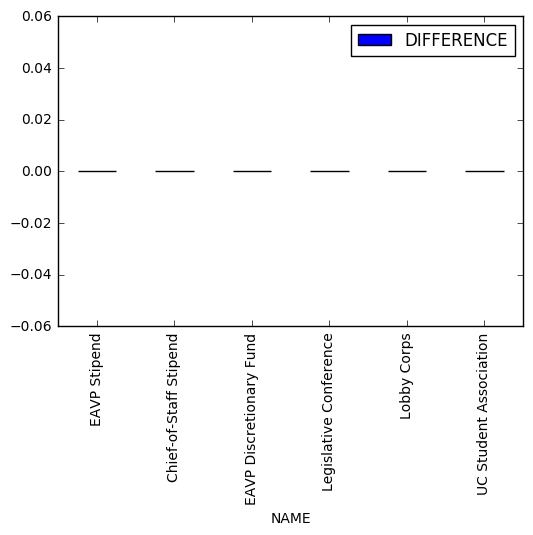

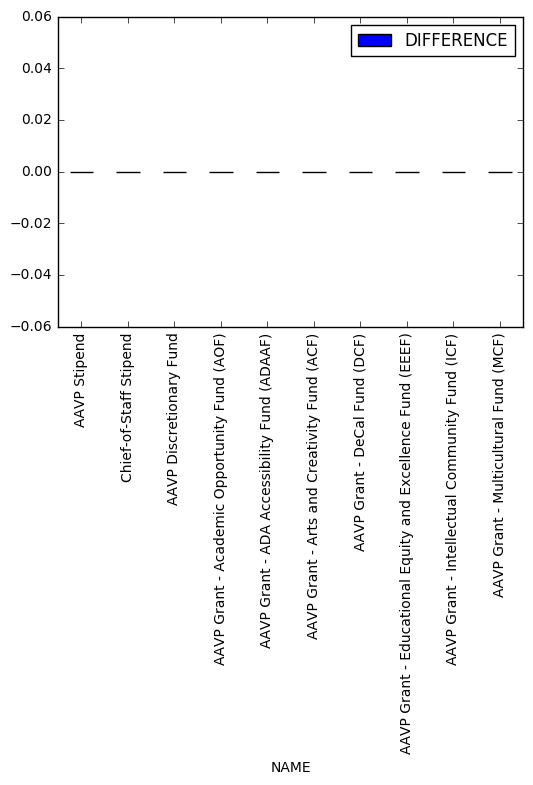

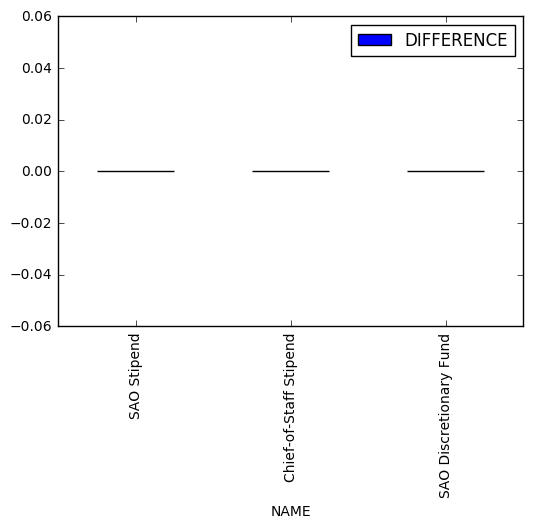

In [36]:
for i in range(len(categories)):    
    plt.figure()
    categories[i].sort_values(['DIFFERENCE'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='NAME',y='DIFFERENCE')
    plt.show()

# Top 10 Difference Percentages in Money Requested vs. Allocated by Organization Type

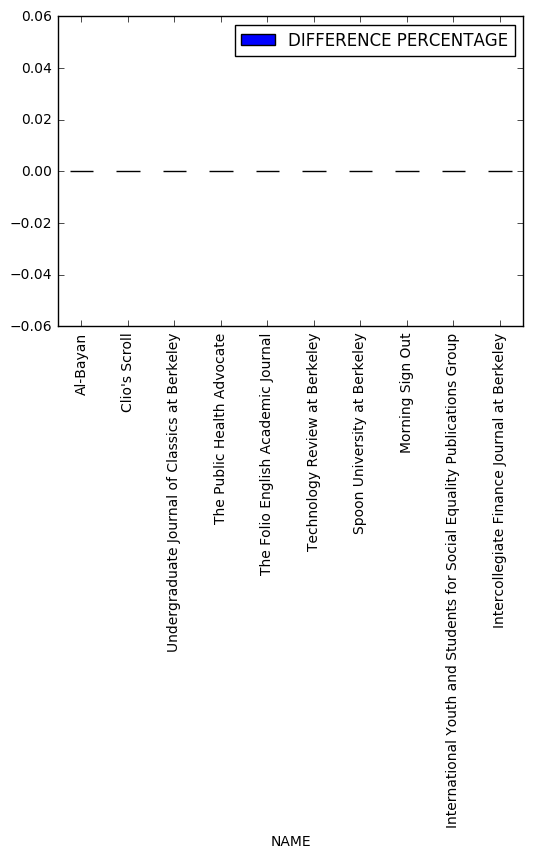

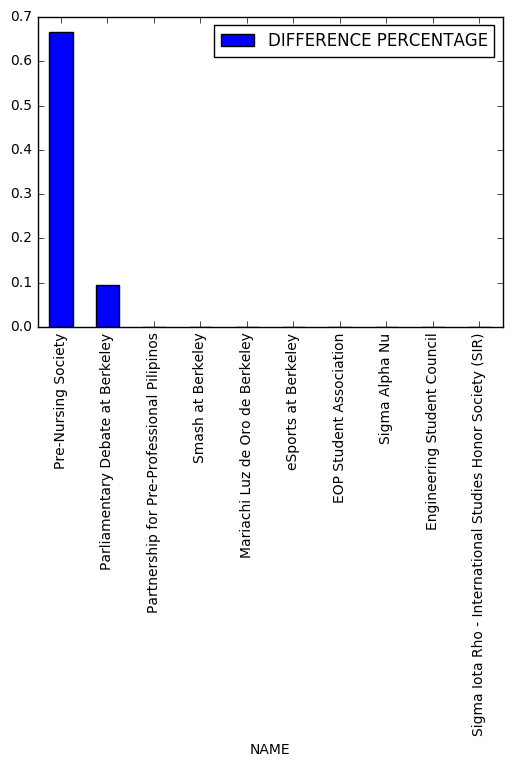

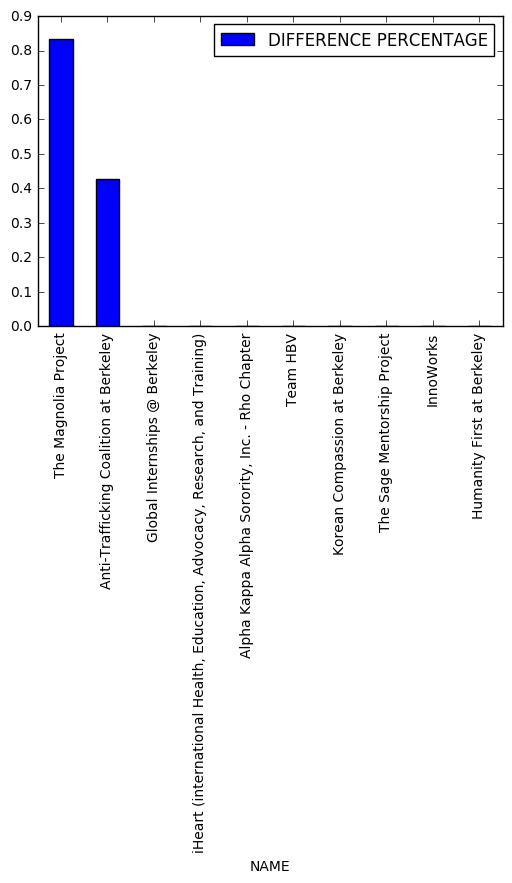

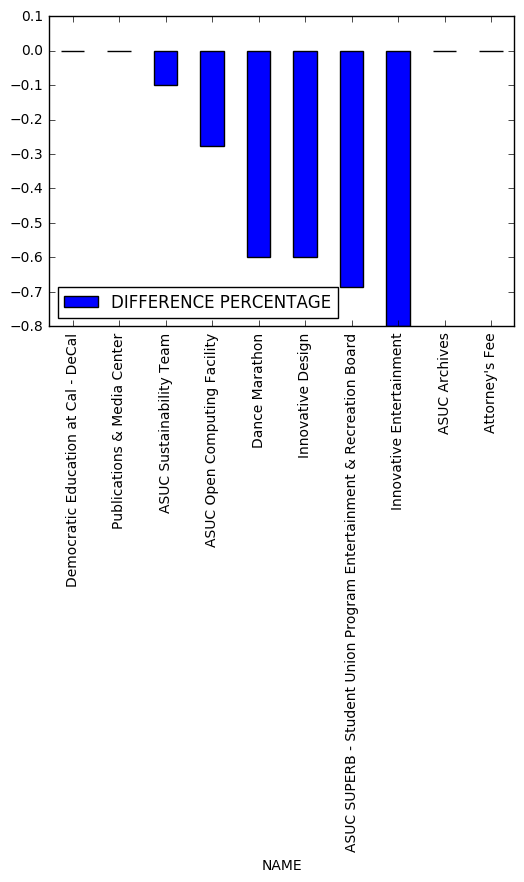

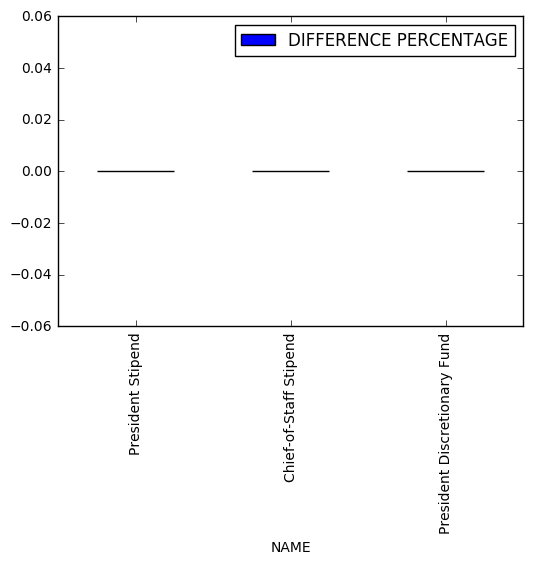

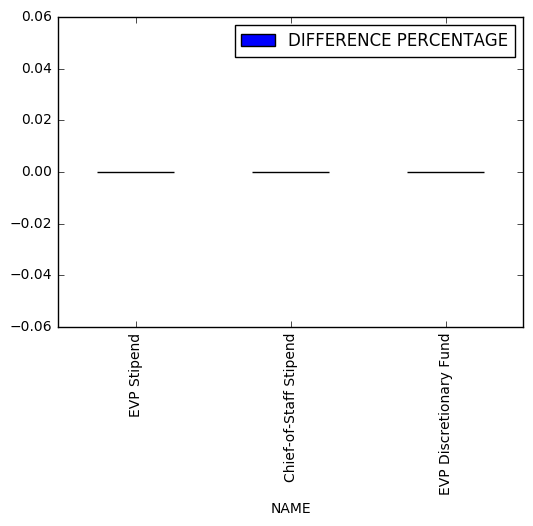

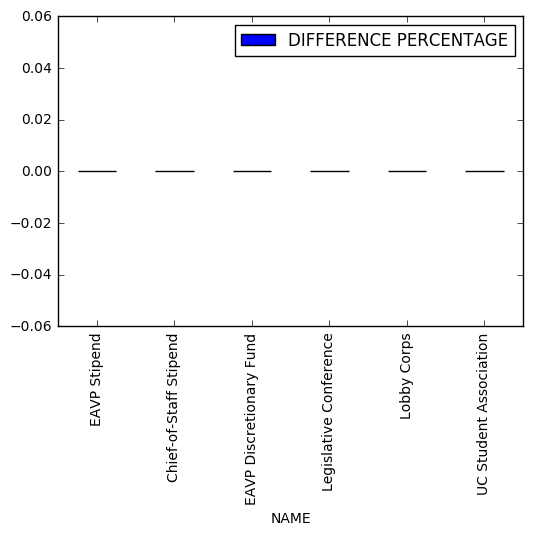

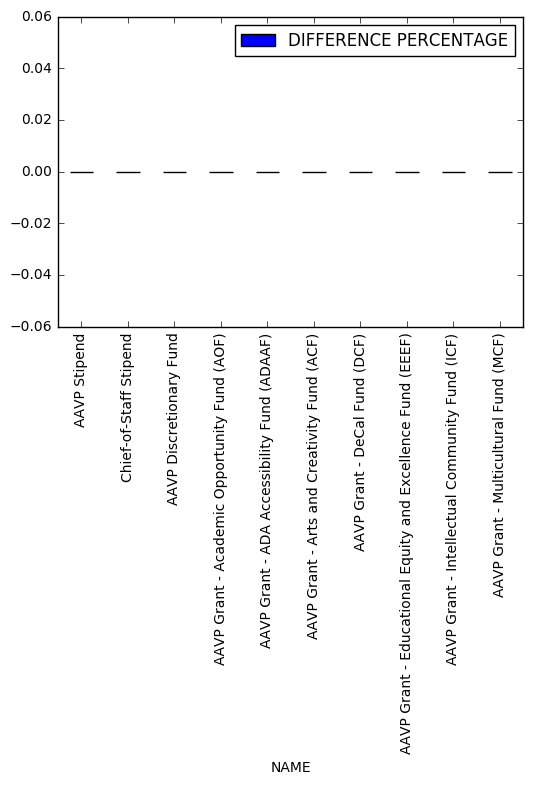

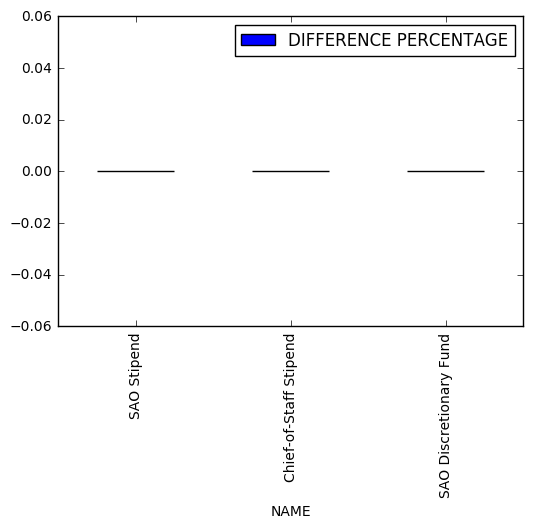

In [37]:
for i in range(len(categories)):
    plt.figure()
    categories[i].sort_values(['DIFFERENCE PERCENTAGE'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='NAME',y='DIFFERENCE PERCENTAGE')
    plt.show()

# Overall Top 10 Differences in Money Requested vs. Allocated

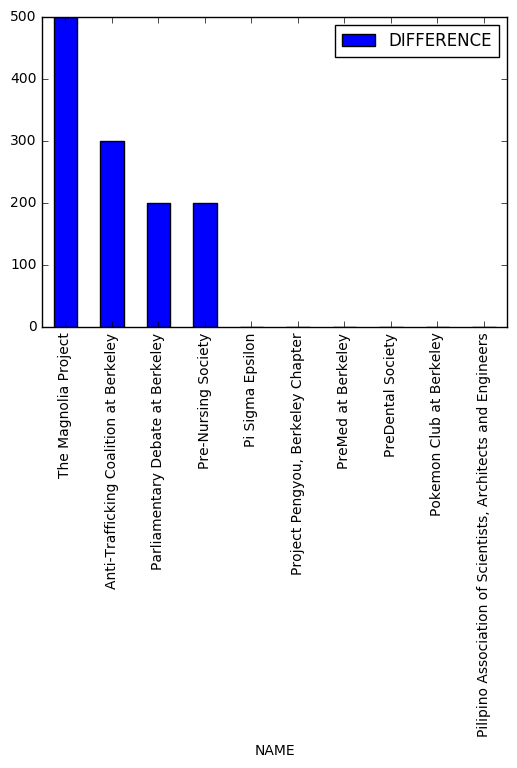

In [38]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['DIFFERENCE'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='NAME',y='DIFFERENCE')
plt.show()

# Overall Top 10 Difference Percentages in Money Requested vs. Allocated

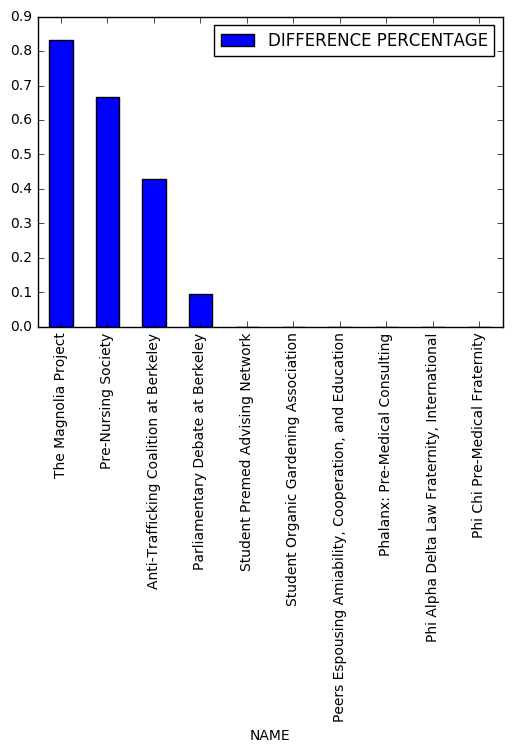

In [39]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['DIFFERENCE PERCENTAGE'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='NAME',y='DIFFERENCE PERCENTAGE')
plt.show()

# Overall Bottom 10 Differences in Money Requested vs. Allocated

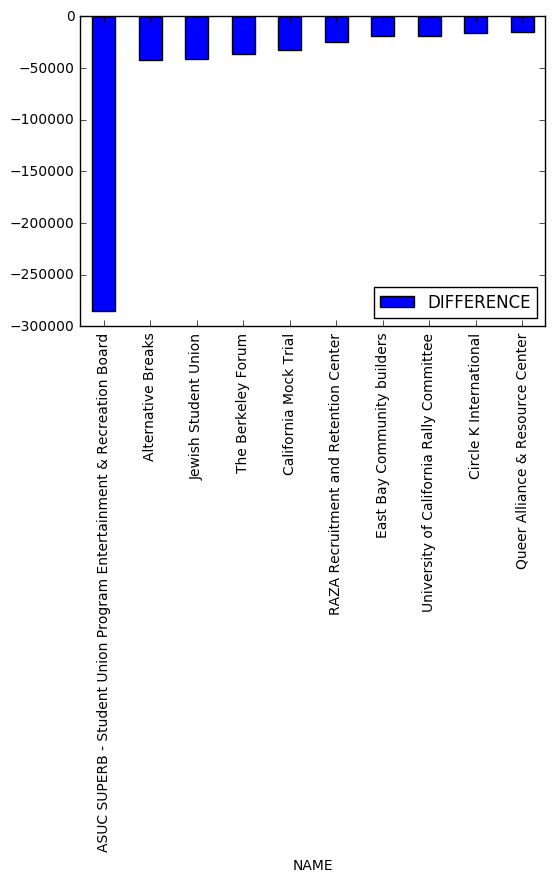

In [40]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['DIFFERENCE'], ascending=True, inplace=False)[0:10].plot(kind='bar', x='NAME',y='DIFFERENCE')
plt.show()

# Overall Bottom 10 Difference Percentages in Money Requested vs. Allocated

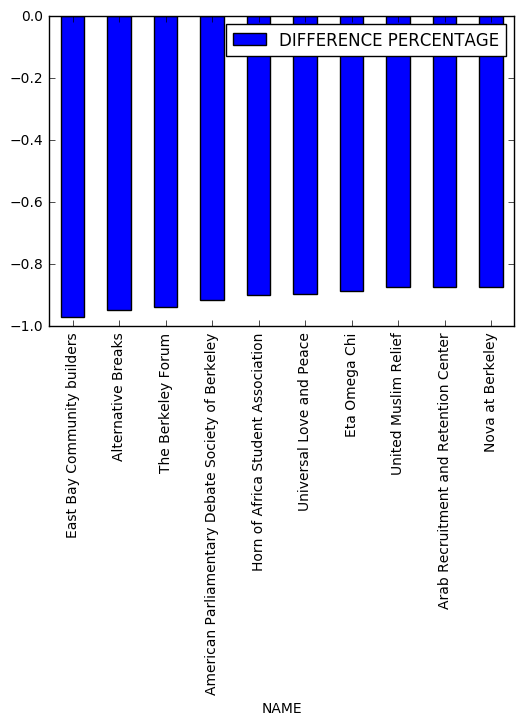

In [41]:
all_combined = pd.concat(categories)

plt.figure()
all_combined.sort_values(['DIFFERENCE PERCENTAGE'], ascending=True, inplace=False)[0:10].plot(kind='bar', x='NAME',y='DIFFERENCE PERCENTAGE')
plt.show()

# Clubs to Look At

Pre-Nursing Society,
Parliamentary Debate at Berkeley,
The Magnolia Project,
Anti-Trafficking Coalition at Berkeley,
SUPERB,
OCF,
Innovative Design,
The Berkeley Forum